In [2]:
import pandas as pd
data= pd.read_csv("D:\\Data Science-Ayesha\\Salary_Data (1).csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [6]:
import seaborn as sns

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

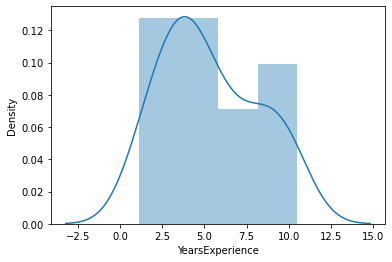

In [7]:
sns.distplot(data['YearsExperience'])

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

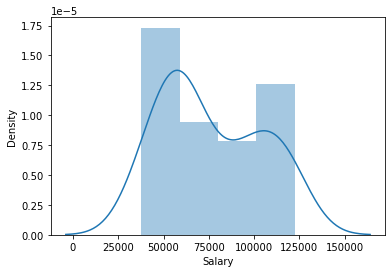

In [8]:
sns.distplot(data['Salary'])

In [9]:
import statsmodels.formula.api as smf

In [10]:
model=smf.ols("Salary~YearsExperience",data=data).fit()

In [11]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

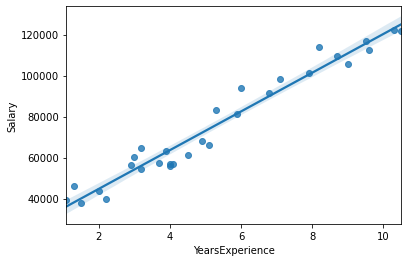

In [12]:
sns.regplot(x='YearsExperience',y='Salary', data=data);

In [13]:
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [14]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [15]:
#predict for new data point 3&5 years of experience
import pandas as pd
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [22]:
data_pred= pd.DataFrame(new_data,columns= ["YearsExperience"])
data_pred
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [26]:
import numpy as np

In [27]:
np.sqrt(data.iloc[:,1])

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: Salary, dtype: float64

In [28]:
np.sqrt(data.iloc[:,0])

0     1.048809
1     1.140175
2     1.224745
3     1.414214
4     1.483240
5     1.702939
6     1.732051
7     1.788854
8     1.788854
9     1.923538
10    1.974842
11    2.000000
12    2.000000
13    2.024846
14    2.121320
15    2.213594
16    2.258318
17    2.302173
18    2.428992
19    2.449490
20    2.607681
21    2.664583
22    2.810694
23    2.863564
24    2.949576
25    3.000000
26    3.082207
27    3.098387
28    3.209361
29    3.240370
Name: YearsExperience, dtype: float64

In [29]:
model1 = smf.ols("Salary~np.sqrt(YearsExperience)",data=data).fit()

In [31]:
model1.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           8.57e-18
Time:                        14:35:16   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print = (model1.conf_int(0.05))
print

,0,1
Intercept,-26137.207361,-5974.330873
np.sqrt(YearsExperience),37127.081569,45874.279597


<module 'matplotlib.pyplot' from 'C:\\Users\\Mohammed Nouman\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

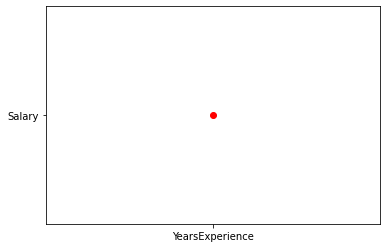

In [41]:
import matplotlib.pyplot as plt
plt.scatter(x='YearsExperience',y='Salary',color="red");plt

In [1]:
#2.PROBLEM Delivery_Time

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
data=pd.read_csv("D:\\Data Science-Ayesha\\delivery_time (1).csv")

In [7]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

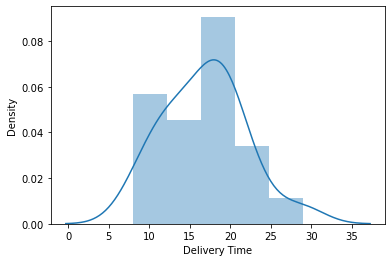

In [9]:
#EDA &VISUALIZATION
sns.distplot(data['Delivery Time'])

C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

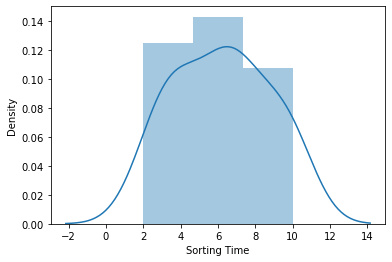

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
#rename columns
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [12]:
#correlation
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='delivery_time', ylabel='delivery_time'>

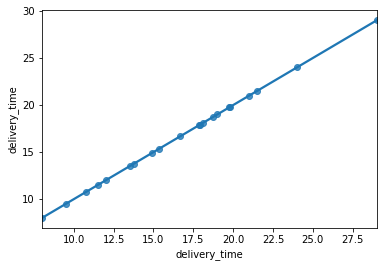

In [13]:
sns.regplot(x=data['delivery_time'],y=data['delivery_time'])

In [14]:
#model building
model=smf.ols("delivery_time~sorting_time",data=data).fit()


In [15]:

model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
#tvalues & p values
model.pvalues, model.tvalues


(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [17]:
#rsquared
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [18]:
#MODEL PREDICTION for say sorting time 5
delivery_time=(6.582734)+(1.649020)*5
delivery_time

14.827834

In [19]:
#automatic prediction
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [20]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [21]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [22]:
import numpy as np

In [23]:
data.agg(['skew']).transpose()

,skew
delivery_time,0.352390
sorting_time,0.047115


In [24]:
np.sqrt(data.iloc[:,0])

0     4.582576
1     3.674235
2     4.444097
3     4.898979
4     5.385165
5     3.917908
6     4.358899
7     3.082207
8     4.230839
9     4.330127
10    4.453089
11    3.278719
12    4.084116
13    3.391165
14    3.468429
15    3.857460
16    3.708099
17    4.255585
18    2.828427
19    4.222558
20    4.636809
Name: delivery_time, dtype: float64

In [25]:
np.sqrt(data.iloc[:,1])

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: sorting_time, dtype: float64

In [26]:
model2=model=smf.ols("delivery_time~np.sqrt(sorting_time)",data=data).fit()

In [27]:
model2.params

Intercept               -2.518837
np.sqrt(sorting_time)    7.936591
dtype: float64

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           2.61e-06
Time:                        21:28:33   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting_time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(model2.conf_int(0.05))

                              0          1
Intercept             -8.788214   3.750541
np.sqrt(sorting_time)  5.416812  10.456370


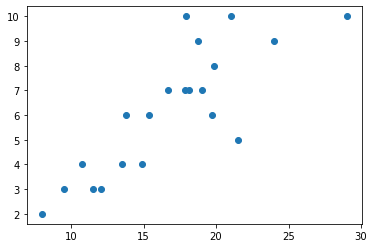

In [30]:
import matplotlib.pyplot as plt
plt.scatter(x='delivery_time',y='sorting_time',data=data)
plt.show()